# Integrantes 
# Danny Jaramillo
# Danny Vasquez
# Angel Minga


In [1]:
import numpy as np
import random as rnd
import pandas as pd
import matplotlib as plt1
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#jugadores
jug1="Angel"
jug2="Pedro"

#instancias
instancia=0.5  #la otra no la escribo ya que se solo hay dos rangos 0.50 y 0.50

#probabilidad
C1=0#'cara'
C2=1#'sello'

tam=50; #tamaño
tam1=100; #tamaño
tam2=150; #tamaño

In [3]:
#gnerador num aleatorios
def gen_num():
    return rnd.random()
#generar aleatorio entre 0 y 1 para cara o sello segun el jugador
def gen_dist_uni():
    x=rnd.random()
    if x>=instancia:
        return 1
    else:
        return 0

In [4]:
#genera los numeros aleatorios de los lanzamientos
# de la moneda de acuerdo a la instancias instancia 0.5 o 0.7
def get_label(X):
    if X>0 and X<=instancia:
        return C1
    if X>instancia and X<=1:
        return C2

# Se crea 3 matriz con tamaño de 50 100 y 150

In [5]:
# [0] Jugador1 [1] jugador2 [2]T1  [3]T2  [4]T3   [5]j1 loss=0/win=1  [6]j2 loss=0/win=1 
md=np.zeros((tam,7))
md100=np.zeros((tam1,7))
md150=np.zeros((tam2,7))

In [6]:
#llenar matriz con datos de los jugadores y los tres tiros de la moneda
def llenar_matriz(matriz,tam):
    for i in range(tam):
        cs=gen_dist_uni()
        matriz[i,0]=cs
        matriz[i,1]=abs(cs-1)
        matriz[i,2]=get_label(gen_num())
        matriz[i,3]=get_label(gen_num())
        if matriz[i,2]==matriz[i,3]:
            matriz[i,4]=2
        else:
            matriz[i,4]=get_label(gen_num())                               
                    

# Llenar la matriz con los valores

In [7]:
llenar_matriz(md,tam)
llenar_matriz(md100,tam1)
llenar_matriz(md150,tam2)

In [8]:
#md
#   A    L   T1  T2  T3  A   L

In [9]:
#md100

In [10]:
#md150

In [11]:
#método para verificar si uno de los jugadores gana o pierde según lo que escoja sello o cara
def verifica_gana(juga1,juga2,val):
    if juga1==val:
        return 1
    if juga2==val:
        return 0

In [12]:
#método para asignar valores a las columnas  5 y 6 determinado si gana o pierde el jugador 1 o jugador 2
def asigna_gana(matriz,val,i):
    if val==0:
        matriz[i,5]=0
        matriz[i,6]=1
    else:
        matriz[i,5]=1
        matriz[i,6]=0

# Se evalua los datos determinando el ganador de la ronda

In [13]:
def compara_datos_tiros(matriz,tam):
    for i in range (tam):
        if  matriz[i,2]==matriz[i,3] or matriz[i,2]==matriz[i,4]:
            valor=verifica_gana(matriz[i,0],matriz[i,1],matriz[i,2])
            asigna_gana(matriz,valor,i)
        elif matriz[i,3]==matriz[i,4]:
            valor=verifica_gana(matriz[i,0],matriz[i,1],matriz[i,3])
            asigna_gana(matriz,valor,i)

In [14]:
# Prueba con 50 datos
compara_datos_tiros(md,tam)
# Prueba con 100 datos
compara_datos_tiros(md100,tam1)
# Prueba con 150 datos
compara_datos_tiros(md150,tam2)

In [15]:
md
#       A   L   T1  T2  T3  A   L

array([[0., 1., 0., 0., 2., 1., 0.],
       [1., 0., 1., 1., 2., 1., 0.],
       [1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 2., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 2., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 1., 2., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 2., 0., 1.],
       [0., 1., 1., 1., 2., 0., 1.],
       [0., 1., 1., 1., 2., 0., 1.],
       [1., 0., 1., 1., 2., 1., 0.],
       [0., 1., 0., 0., 2., 1., 0.],
       [1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 2., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 2., 1., 0.],
       [0., 1., 1., 1., 2., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0.],
 

In [16]:
#md100
#    A   L   T1  T2  T3  A   L

In [17]:
#md100
#    A   L   T1  T2  T3  A   L

# De matriz a Dataframe

In [18]:
df50=pd.DataFrame(md)
df100=pd.DataFrame(md100)
df150=pd.DataFrame(md150)

In [19]:
#df50

# Resultado de el número de caras y sellos por cada jugador

In [20]:
#Ts total de sellos que salen en instancia 0.70  0.30
TS_JG1 = df50[0].sum()
TS_JG2 = df50[1].sum()
TS_JG1_100 = df100[0].sum()
TS_JG2_100 = df100[1].sum()
TS_JG1_150 = df150[0].sum()
TS_JG2_150 = df150[1].sum()
print("Jugador %s saco %s sello  y %s  caras" %(jug1,TS_JG1,(tam-TS_JG1)))
print("Jugador %s saco %s sello  y %s  caras" %(jug2,TS_JG2,(tam-TS_JG2)))
print("Jugador %s saco %s sello  y %s  caras" %(jug1,TS_JG1_100,(tam1-TS_JG1_100)))
print("Jugador %s saco %s sello  y %s  caras" %(jug2,TS_JG2_100,(tam1-TS_JG2_100)))
print("Jugador %s saco %s sello  y %s  caras" %(jug1,TS_JG1_150,(tam2-TS_JG1_150)))
print("Jugador %s saco %s sello  y %s  caras" %(jug2,TS_JG2_150,(tam2-TS_JG2_150)))

Jugador Angel saco 21.0 sello  y 29.0  caras
Jugador Pedro saco 29.0 sello  y 21.0  caras
Jugador Angel saco 46.0 sello  y 54.0  caras
Jugador Pedro saco 54.0 sello  y 46.0  caras
Jugador Angel saco 77.0 sello  y 73.0  caras
Jugador Pedro saco 73.0 sello  y 77.0  caras


# Número de veces que ganó cada jugador

In [21]:
TG1_jg50= df50[5].sum()
TG2_jg50= df50[6].sum()
TG1_jg100= df100[5].sum()
TG2_jg100= df100[6].sum()
TG1_jg150= df150[5].sum()
TG2_jg150= df150[6].sum()
print("________Prueba con 50 datos_____________")
print("Jugador %s  gano  %s veces" %(jug1,TG1_jg50))
print("Jugador %s  gano  %s veces" %(jug2,TG2_jg50))
print("________Prueba con 100 datos____________")
print("Jugador %s  gano  %s veces" %(jug1,TG1_jg100))
print("Jugador %s  gano  %s veces" %(jug2,TG2_jg100))
print("________Prueba con 150 datos____________")
print("Jugador %s  gano  %s veces" %(jug1,TG1_jg150))
print("Jugador %s  gano  %s veces" %(jug2,TG2_jg150))

________Prueba con 50 datos_____________
Jugador Angel  gano  20.0 veces
Jugador Pedro  gano  30.0 veces
________Prueba con 100 datos____________
Jugador Angel  gano  51.0 veces
Jugador Pedro  gano  49.0 veces
________Prueba con 150 datos____________
Jugador Angel  gano  83.0 veces
Jugador Pedro  gano  67.0 veces


In [22]:
#df50

In [23]:
df_t = pd.DataFrame({'Jugador': [jug1,jug2], '50': [TG1_jg50,TG2_jg50],'100': [TG1_jg100,TG2_jg100],'150': [TG1_jg150,TG2_jg150]},columns=['Jugador', '50', '100', '150'])

In [24]:
df_t

Jugador    50   100   150
0   Angel  20.0  51.0  83.0
1   Pedro  30.0  49.0  67.0

# Gráfica de las ganancias de los jugadores con datos de 50,100,150

In [25]:
# Suma de la columna 3
def sumaColuman3(matriz,tam):
    sumaval=0
    for i in range (tam):
        if matriz[i,4]==1:
           sumaval=sumaval+1
    
    return sumaval


In [26]:
# Suma de la columna 3 valores de 2
def sumaColumana(matriz,tam):
    sumaval=0
    for i in range (tam):
        if matriz[i,4]==0:
           sumaval=sumaval+1
    
    return sumaval

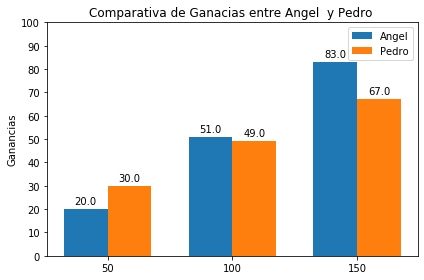

In [27]:
subject=['50', '100', '150']
dataset=df_t.groupby('Jugador')[subject].mean()
#print(dataset)
x=np.arange(len(subject))
width = 0.35  # the width of the bars
score_label=np.arange(0,110,10)
#print(dataset.T)
jugador1_datos=list(dataset.T[jug1])
jugador2_datos=list(dataset.T[jug2])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, jugador1_datos, width, label=jug1)
rects2 = ax.bar(x + width/2, jugador2_datos, width, label=jug2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ganancias')
ax.set_title('Comparativa de Ganacias entre %s  y %s ' %(jug1,jug2))
ax.set_xticks(x)
ax.set_xticklabels(subject)
# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()


def autolabel(rects):
    """Coloca una etiqueta de texto sobre cada barra en *rects*, mostrando su altura."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Datos para graficar los tiros de la moneda

In [28]:
T1_50= df50[2].sum()
T2_50= df50[3].sum()
T3_50= sumaColuman3(md,tam)
valor50_2=sumaColumana(md,tam)
T1_100= df100[2].sum()
T2_100= df100[3].sum()
T3_100= sumaColuman3(md100,tam1)
valor100_2=sumaColumana(md100,tam1)
T1_150= df150[2].sum()
T2_150= df150[3].sum()
T3_150=sumaColuman3(md150,tam2)
valor150_2=sumaColumana(md150,tam2)

In [29]:
df_CS50 = pd.DataFrame({'Cara/Sello': ['Sello','Cara'], 'T1': [T1_50,(tam-T1_50)],'T2': [T2_50,(tam-T2_50)],'T3': [T3_50,(valor50_2)]},columns=['Cara/Sello', 'T1', 'T2', 'T3'])

In [30]:
df_CS100 = pd.DataFrame({'Cara/Sello': ['Sello','Cara'], 'T1': [T1_100,(tam1-T1_100)],'T2': [T2_100,(tam1-T2_100)],'T3': [T3_100,(valor100_2)]},columns=['Cara/Sello', 'T1', 'T2', 'T3'])

In [31]:
df_CS150 = pd.DataFrame({'Cara/Sello': ['Sello','Cara'], 'T1': [T1_150,(tam2-T1_150)],'T2': [T2_150,(tam2-T2_150)],'T3': [T3_150,(valor150_2)]},columns=['Cara/Sello', 'T1', 'T2', 'T3'])

In [32]:
df_CS50

Cara/Sello    T1    T2  T3
0      Sello  30.0  28.0  16
1       Cara  20.0  22.0   8

In [33]:
df_CS100

Cara/Sello    T1    T2  T3
0      Sello  45.0  55.0  22
1       Cara  55.0  45.0  20

In [34]:
df_CS150

Cara/Sello    T1    T2  T3
0      Sello  73.0  76.0  36
1       Cara  77.0  74.0  45

# Gráfica de 50

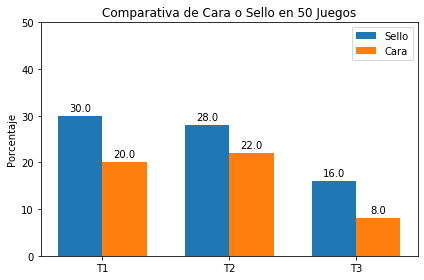

In [35]:
subject=['T1', 'T2', 'T3']
dataset=df_CS50.groupby('Cara/Sello')[subject].mean()
#print(dataset)
x=np.arange(len(subject))
width = 0.35  # the width of the bars
score_label=np.arange(0,60,10)
#print(dataset.T)
sello=list(dataset.T["Sello"])
cara=list(dataset.T["Cara"])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sello, width, label="Sello")
rects2 = ax.bar(x + width/2, cara, width, label="Cara")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje')
ax.set_title('Comparativa de Cara o Sello en 50 Juegos')
# inserting x axis label
ax.set_xticks(x)
ax.set_xticklabels(subject)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Gráfica de 100

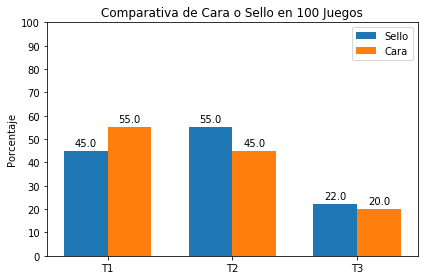

In [36]:
subject=['T1', 'T2', 'T3']
dataset=df_CS100.groupby('Cara/Sello')[subject].mean()
#print(dataset)
x=np.arange(len(subject))
width = 0.35  # the width of the bars
score_label=np.arange(0,110,10)
#print(dataset.T)
sello=list(dataset.T["Sello"])
cara=list(dataset.T["Cara"])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sello, width, label="Sello")
rects2 = ax.bar(x + width/2, cara, width, label="Cara")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje')
ax.set_title('Comparativa de Cara o Sello en 100 Juegos')
# inserting x axis label
ax.set_xticks(x)
ax.set_xticklabels(subject)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Gráfica de 150

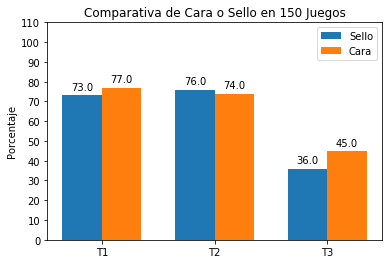

In [37]:
subject=['T1', 'T2', 'T3']
dataset=df_CS150.groupby('Cara/Sello')[subject].mean()
#print(dataset)
x=np.arange(len(subject))
width = 0.35  # the width of the bars
score_label=np.arange(0,120,10)
#print(dataset.T)
sello=list(dataset.T["Sello"])
cara=list(dataset.T["Cara"])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sello, width, label="Sello")
rects2 = ax.bar(x + width/2, cara, width, label="Cara")
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Porcentaje')
ax.set_title('Comparativa de Cara o Sello en 150 Juegos')

# inserting x axis label
ax.set_xticks(x)
ax.set_xticklabels(subject)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)

autolabel(rects1)
autolabel(rects2)

plt.show()